# Convolutional Neural Networks

In [13]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split

In [14]:
print(tensorflow.__version__)

2.0.0


In [15]:
# loading the fashion mnist dataset

#The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

4423680/4422102 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [16]:
# distribution of target variable
pd.Series(train_Y).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

Text(0.5, 1.0, 'Ground Truth : 2')

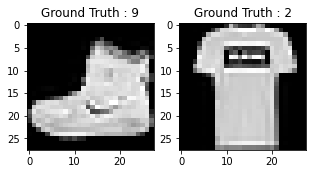

In [20]:
# Display the first image in training data
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap = 'gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(train_X[1,:,:], cmap = 'gray')
plt.title("Ground Truth : {}".format(test_Y[1]))

In [21]:
# reshaping the data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [22]:
# getting the pixel values between 0 and 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0

In [23]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
# creating validation set
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 100)

In [25]:
# setting the batch size, epochs and number of classes
batch_size = 64
epochs = 20
num_classes = 10

In [26]:
# creating the network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'linear', input_shape=(28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2), padding = 'same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
fashion_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(Dense(num_classes, activation = 'softmax'))

2022-04-21 13:46:41.113722: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 13:46:41.115886: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [28]:
# compiling the model
fashion_model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])

In [29]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [30]:
# training the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 169s 4ms/sample - loss: 0.4691 - accuracy: 0.8305 - val_loss: 0.3064 - val_accuracy: 0.8844
Epoch 2/20
48000/48000 [==============================] - 169s 4ms/sample - loss: 0.2906 - accuracy: 0.8945 - val_loss: 0.2735 - val_accuracy: 0.8989
Epoch 3/20
48000/48000 [==============================] - 168s 3ms/sample - loss: 0.2459 - accuracy: 0.9111 - val_loss: 0.2584 - val_accuracy: 0.9053
Epoch 4/20
48000/48000 [==============================] - 169s 4ms/sample - loss: 0.2133 - accuracy: 0.9215 - val_loss: 0.2240 - val_accuracy: 0.9166
Epoch 5/20
48000/48000 [==============================] - 177s 4ms/sample - loss: 0.1880 - accuracy: 0.9315 - val_loss: 0.2437 - val_accuracy: 0.9147
Epoch 6/20
48000/48000 [==============================] - 181s 4ms/sample - loss: 0.1662 - accuracy: 0.9391 - val_loss: 0.2192 - val_accuracy: 0.9197
Epoch 7/20
48000/48000 [==========================

In [31]:
# model evaluation
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)
print('Test accuracy:', test_eval[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.9199


In [ ]:
# Try to improve the accuracy of the above model by hyper parameter tuning and adding / removing / updating layers. 
# (try wider and deeper models)